# Lien entre performance énergétique des logements (DPE) et niveau de vie des ménages
## Une analyse à l'échelle des communes d'Ile-de-France

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1) Récupération des données:

### Données de l'ADEME (DPE)

In [2]:
# Récupération des données de l'ADEME portant sur la performance énergétique des logements résidentiels situés dans
# les 8 départements d'Ile-de-France:
Paris=pd.read_csv("https://koumoul.com/data-fair/api/v1/datasets/dpe-75/data-files/dpe-75.csv")
Seine_et_Marne=pd.read_csv("https://koumoul.com/data-fair/api/v1/datasets/dpe-77/data-files/dpe-77.csv")
Yvelines=pd.read_csv("https://koumoul.com/data-fair/api/v1/datasets/dpe-78/data-files/dpe-78.csv")
Essonne=pd.read_csv("https://koumoul.com/data-fair/api/v1/datasets/dpe-91/data-files/dpe-91.csv")
Hauts_de_Seine=pd.read_csv("https://koumoul.com/data-fair/api/v1/datasets/dpe-92/data-files/dpe-92.csv")
Seine_saint_Denis=pd.read_csv("https://koumoul.com/data-fair/api/v1/datasets/dpe-93/data-files/dpe-93.csv")
Val_de_Marne=pd.read_csv("https://koumoul.com/data-fair/api/v1/datasets/dpe-94/data-files/dpe-94.csv")
Val_Oise=pd.read_csv("https://koumoul.com/data-fair/api/v1/datasets/dpe-95/data-files/dpe-95.csv")

/tmp/ipykernel_443/3939422412.py:3: DtypeWarning: Columns (8,35,36,37,43,76,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  Paris=pd.read_csv("https://koumoul.com/data-fair/api/v1/datasets/dpe-75/data-files/dpe-75.csv")
/tmp/ipykernel_443/3939422412.py:4: DtypeWarning: Columns (8,27,35,36,37,39,43,76,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  Seine_et_Marne=pd.read_csv("https://koumoul.com/data-fair/api/v1/datasets/dpe-77/data-files/dpe-77.csv")
/tmp/ipykernel_443/3939422412.py:5: DtypeWarning: Columns (35,36,37,43,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  Yvelines=pd.read_csv("https://koumoul.com/data-fair/api/v1/datasets/dpe-78/data-files/dpe-78.csv")
/tmp/ipykernel_443/3939422412.py:6: DtypeWarning: Columns (35,36,37,43,76,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  Essonne=pd.read_csv("https://koumoul.com/data-fair/ap

In [3]:
DPE_IDF=pd.concat([Paris,Seine_et_Marne,Yvelines,Essonne,Hauts_de_Seine,Seine_saint_Denis,Val_de_Marne,Val_Oise])

In [4]:
DPE_IDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587477 entries, 0 to 163887
Columns: 131 entries, id to tv018_zone_ete_rclim_dernier_etage
dtypes: float64(49), int64(28), object(54)
memory usage: 1.6+ GB


In [5]:
# Liste de toutes les variables dans le fichier:
print(DPE_IDF.columns.tolist())

['id', 'numero_dpe', 'usr_diagnostiqueur_id', 'usr_logiciel_id', 'tr001_modele_dpe_id', 'nom_methode_dpe', 'version_methode_dpe', 'nom_methode_etude_thermique', 'version_methode_etude_thermique', 'date_visite_diagnostiqueur', 'date_etablissement_dpe', 'date_arrete_tarifs_energies', 'commentaires_ameliorations_recommandations', 'explication_personnalisee', 'consommation_energie', 'classe_consommation_energie', 'estimation_ges', 'classe_estimation_ges', 'tr002_type_batiment_id', 'secteur_activite', 'tr012_categorie_erp_id', 'tr013_type_erp_id', 'annee_construction', 'surface_habitable', 'surface_thermique_lot', 'tv016_departement_id', 'commune', 'arrondissement', 'type_voie', 'nom_rue', 'numero_rue', 'batiment', 'escalier', 'etage', 'porte', 'code_postal', 'code_insee_commune', 'code_insee_commune_actualise', 'numero_lot', 'quote_part', 'nom_centre_commercial', 'surface_commerciale_contractuelle', 'portee_dpe_batiment', 'partie_batiment', 'shon', 'surface_utile', 'surface_thermique_parti

In [6]:
# On restreint le dadatframe DPE_IDF aux variables pertinentes pour notre analyse:
DPE_IDF=DPE_IDF.loc[:,["id","numero_dpe","date_visite_diagnostiqueur","consommation_energie","classe_consommation_energie","estimation_ges","classe_estimation_ges","annee_construction","surface_habitable","surface_thermique_lot","commune","code_insee_commune","longitude","latitude","tr002_type_batiment_description","tv016_departement_departement"]]
DPE_IDF.head()

,id,numero_dpe,date_visite_diagnostiqueur,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_habitable,surface_thermique_lot,commune,code_insee_commune,longitude,latitude,tr002_type_batiment_description,tv016_departement_departement
0,176,1375V2000001D,2013-04-10,249.00,E,15.00,C,1947,54.00,54.00,PARIS,75013.0,2.416435,48.930427,Logement,75 - Paris
1,219,1375V2000003F,2013-04-09,692.00,G,22.00,D,1947,23.86,23.86,PARIS,75019.0,6.055365,46.332839,Logement,75 - Paris
2,220,1375V2000004G,2013-04-10,324.00,E,75.00,F,1947,54.89,54.89,PARIS,75012.0,NaN,NaN,Logement,75 - Paris
3,248,1375V2000008K,2013-04-04,377.68,F,12.29,C,1850,38.90,38.90,PARIS,75112.0,3.244265,45.755699,Logement,75 - Paris
4,250,1375V2000009L,2013-04-11,309.00,E,10.00,B,1,80.00,80.00,PARIS,75012.0,2.391975,48.839267,Logement,75 - Paris


### Données de l'INSEE (Fichier FILOSOFI_COM des revenus localisés sociaux et fiscaux en 2016 à l'échelle communale) 

In [7]:
!pip install pathlib2
!pip install python-Levenshtein
!pip install --upgrade xlrd
!pip install git+https://github.com/InseeFrLab/Py-Insee-Data.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 6.7 MB/s eta 0:00:00
  Cloning https://github.com/InseeFrLab/Py-Insee-Data.git to /tmp/pip-req-build-tsinki8_
  Running command git clone --filter=blob:none --quiet https://github.com/InseeFrLab/Py-Insee-Data.git /tmp/pip-req-build-tsinki8_
  Resolved https://github.com/InseeFrLab/Py-Insee-Data.git to commit ebebbb6b95868b98c0ac2fede3080797215f47b9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 9.5 MB/s eta 0:00:00
  Created wheel for pynsee: filename=pynsee-0.1.2-py3-none-any.whl size=9804454 sha256=b5330bcdaafad9f0b5048d068dfffecc65f6cafb6d24195aea539f49a3434d4c
  Stored in directory: /tmp/pip-ephem-wheel-

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pynsee
import pynsee.download

In [9]:
np.random.seed(123)

In [11]:
Filosofi = pynsee.download.download_file("FILOSOFI_COM_2016")

Downloading: 100%|██████████| 2.67M/2.67M [00:00<00:00, 7.94MiB/s]
Extracting: 100%|██████████| 10.6M/10.6M [00:00<00:00, 155MB/s]


In [12]:
Filosofi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34932 entries, 0 to 34931
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODGEO           34932 non-null  object
 1   LIBGEO           34932 non-null  object
 2   NBMENFISC16      31405 non-null  object
 3   NBPERSMENFISC16  31405 non-null  object
 4   MED16            31405 non-null  object
 5   PIMP16           5293 non-null   object
 6   TP6016           4372 non-null   object
 7   TP60AGE116       759 non-null    object
 8   TP60AGE216       1414 non-null   object
 9   TP60AGE316       1826 non-null   object
 10  TP60AGE416       1292 non-null   object
 11  TP60AGE516       890 non-null    object
 12  TP60AGE616       403 non-null    object
 13  TP60TOL116       2155 non-null   object
 14  TP60TOL216       3174 non-null   object
 15  PACT16           5293 non-null   object
 16  PTSA16           5293 non-null   object
 17  PCHO16           5293 non-null 

In [13]:
Filosofi.head()

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,PPEN16,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16
0,01001,L'Abergement-Clémenciat,313,795.5,22679,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01002,L'Abergement-de-Varey,101,248,24382.083333333336,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01004,Ambérieu-en-Bugey,6363,14228,19721,49,17,19,22,22,...,27,8.8,6.9,2.8,2.1,2,-15.7,10457.083333333334,33880.555555555555,3.239962279688143
3,01005,Ambérieux-en-Dombes,633,1662.5,23378,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01006,Ambléon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2) Premiers retraitements sur les données

### a) Retraitement des données de l'ADEME

In [14]:
print(DPE_IDF.columns.tolist())

['id', 'numero_dpe', 'date_visite_diagnostiqueur', 'consommation_energie', 'classe_consommation_energie', 'estimation_ges', 'classe_estimation_ges', 'annee_construction', 'surface_habitable', 'surface_thermique_lot', 'commune', 'code_insee_commune', 'longitude', 'latitude', 'tr002_type_batiment_description', 'tv016_departement_departement']


In [15]:
print(DPE_IDF.dtypes)

id                                   int64
numero_dpe                          object
date_visite_diagnostiqueur          object
consommation_energie               float64
classe_consommation_energie         object
estimation_ges                     float64
classe_estimation_ges               object
annee_construction                   int64
surface_habitable                  float64
surface_thermique_lot              float64
commune                             object
code_insee_commune                  object
longitude                          float64
latitude                           float64
tr002_type_batiment_description     object
tv016_departement_departement       object
dtype: object


In [16]:
print(DPE_IDF.shape)

(1587477, 16)


In [17]:
# Création d'une variable année:
DPE_IDF["annee"]=DPE_IDF.date_visite_diagnostiqueur.str[:4]

In [20]:
DPE_IDF.groupby('annee')["numero_dpe"].count()

annee
0217         1
1013         1
1015         1
1016         3
1753         1
1899        12
1900         1
1932         1
1970         1
1992         1
2000       302
2001         3
2002         2
2003         3
2004         7
2005         2
2006         1
2007         3
2008         7
2009        15
2010        12
2011        55
2012       210
2013     91913
2014    186067
2015    196806
2016    209583
2017    203879
2018    217327
2019    237134
2020    218655
2021     25420
2022         1
2023         1
2024         1
2026         1
2030         1
2041         2
2103        11
2104         5
2105         4
2106         2
2107         4
2108         1
2109         2
2116         2
2130         2
2140         1
2165         1
2213         1
3013         3
3014         1
9999         1
Name: numero_dpe, dtype: int64

> Au vue de ces comptages de DPE réalisé chaque année, on peut se dire que les données de l'ADEME sont suffisamment complètes sur la période 2014-2020.

In [22]:
# Premier filtrage sur les lignes: on ne conserve que les DPE réalisés entre 2014 et 2020
DPE_IDF_14_20 = DPE_IDF[DPE_IDF["annee"].isin(["2014","2015","2016","2017","2018","2019"])].copy()

In [23]:
DPE_IDF_14_20.groupby('annee')["numero_dpe"].count()

annee
2014    186067
2015    196806
2016    209583
2017    203879
2018    217327
2019    237134
Name: numero_dpe, dtype: int64

In [26]:
print(DPE_IDF_14_20["code_insee_commune"].dtype)

object


In [27]:
print(DPE_IDF_14_20[['code_insee_commune']].nunique())

code_insee_commune    6635
dtype: int64


In [31]:
DPE_horsParis=DPE_IDF_14_20[DPE_IDF_14_20["tv016_departement_departement"]!="75 - Paris"]
DPE_Paris=DPE_IDF_14_20[DPE_IDF_14_20["tv016_departement_departement"]=="75 - Paris"]

In [29]:
DPE_horsParis.groupby('tv016_departement_departement')["numero_dpe"].count()

tv016_departement_departement
77 - Seine et Marne       152939
78 - Yvelines             156001
91 - Essonne              138043
92 - Hauts de Seine       167715
93 - Seine Saint Denis    133312
94 - Val de Marne         127742
95 - Val d'Oise           132640
Name: numero_dpe, dtype: int64

In [32]:
DPE_Paris.groupby('tv016_departement_departement')["numero_dpe"].count()

tv016_departement_departement
75 - Paris    242404
Name: numero_dpe, dtype: int64

In [30]:
print(DPE_horsParis[['code_insee_commune']].nunique())

code_insee_commune    4413
dtype: int64


In [33]:
print(DPE_Paris[['code_insee_commune']].nunique())

code_insee_commune    2920
dtype: int64


In [35]:
DPE_Paris['code_insee_commune'].unique()

array(['75056', '75110', '75115', ..., '2A018', '01034', '42010'],
      dtype=object)

In [36]:
DPE_Paris['code_insee_commune'].value_counts()

75056      94881
75056.0    30755
75115       9040
75119       6337
75116       5957
           ...  
2014.0         1
56007.0        1
65016          1
84034.0        1
42010          1
Name: code_insee_commune, Length: 2920, dtype: int64

In [37]:
# On ne garde ici que les DPE localisés dans un arrondissement de Paris bien identifié:
DPE_Paris_c=DPE_Paris[DPE_Paris['code_insee_commune'].isin(["75101","75102","75103","75104","75105","75106","75107",
"75108","75109","75110","75111","75112","75113","75114","75115","75116","75117","75118","75119","75120"])]

In [38]:
DPE_Paris_c['code_insee_commune'].value_counts()

75115    9040
75119    6337
75116    5957
75118    5941
75117    5696
75114    4724
75120    4613
75113    4536
75111    4011
75112    3970
75110    2990
75107    2154
75109    1934
75103    1838
75105    1711
75108    1664
75106    1637
75104    1541
75101    1056
75102     874
Name: code_insee_commune, dtype: int64

In [39]:
DPE_Paris_c.head()

,id,numero_dpe,date_visite_diagnostiqueur,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_habitable,surface_thermique_lot,commune,code_insee_commune,longitude,latitude,tr002_type_batiment_description,tv016_departement_departement,annee
19824,548668,1375V2010388W,2014-12-23,424.56,F,13.82,C,1900,43.00,43.00,PARIS,75110,2.355244,48.873940,Logement,75 - Paris,2014
20016,554800,1475V2000008L,2014-01-02,419.24,F,81.56,G,1948,32.01,32.01,PARIS,75115,2.313344,48.843078,Logement,75 - Paris,2014
20024,554903,1475L2000006I,2014-01-02,319.39,E,10.39,B,1947,40.00,40.00,PARIS,75111,2.369706,48.864665,Logement,75 - Paris,2014
20027,554930,1475L2000007J,2014-01-02,0.00,N,0.00,N,1900,61.90,61.90,PARIS,75102,2.346063,48.864829,Logement,75 - Paris,2014
20031,555032,1475L2000008K,2014-01-02,262.34,E,8.54,B,1947,21.00,21.00,PARIS,75103,2.360059,48.865255,Logement,75 - Paris,2014


In [43]:
# Tableau croisé: on croise les arrondissements parisiens et la classe de conso d'énergie des logements
pd.crosstab(DPE_Paris_c["code_insee_commune"],DPE_Paris_c["classe_consommation_energie"],normalize='index')*100
# calcul des pourcentages en ligne.

classe_consommation_energie,A,B,C,D,E,F,G,N
code_insee_commune,,,,,,,,
75101,10.037879,1.515152,5.587121,18.750000,17.234848,8.806818,6.155303,31.912879
75102,10.640732,3.089245,7.093822,12.814645,16.704805,9.725400,5.835240,34.096110
75103,8.705114,0.979325,5.277476,15.016322,16.485310,8.541893,5.386289,39.608270
75104,8.955224,9.928618,2.790396,9.993511,12.329656,6.683971,3.763790,45.554835
75105,6.428989,1.227352,18.410286,13.676213,13.851549,8.649912,4.266511,33.489188
75106,6.291998,2.687844,7.269395,17.837508,19.547954,10.873549,5.070250,30.421503
75107,7.799443,1.299907,7.613742,23.073352,20.380687,6.592386,2.971216,30.269266
75108,8.834135,1.682692,9.795673,21.153846,15.384615,7.211538,5.288462,30.649038
75109,10.289555,4.912099,7.238883,15.408480,16.597725,8.428128,5.687694,31.437435


> On peut remarquer que dans chaque arrondissement, on a une part des classes de consommation d'énergie non
renseignées (modalité à N). Dans la suite, on ne travaillera que sur les DPE avec une classe de consommation
d'énergie renseignée. D'où le filtre:

In [45]:
DPE_Paris_c2=DPE_Paris_c[DPE_Paris_c["classe_consommation_energie"]!="N"]

In [47]:
pd.crosstab(DPE_Paris_c2["code_insee_commune"],DPE_Paris_c2["classe_consommation_energie"],normalize='index',\
            margins=True)*100

classe_consommation_energie,A,B,C,D,E,F,G
code_insee_commune,,,,,,,
75101,14.742698,2.225313,8.205841,27.538248,25.312935,12.934631,9.040334
75102,16.145833,4.687500,10.763889,19.444444,25.347222,14.756944,8.854167
75103,14.414414,1.621622,8.738739,24.864865,27.297297,14.144144,8.918919
75104,16.448153,18.235995,5.125149,18.355185,22.646007,12.276520,6.912992
75105,9.666081,1.845343,27.680141,20.562390,20.826011,13.005272,6.414763
75106,9.043020,3.863038,10.447761,25.636523,28.094820,15.627744,7.287094
75107,11.185087,1.864181,10.918775,33.089214,29.227696,9.454061,4.260985
75108,12.738302,2.426343,14.124783,30.502600,22.183709,10.398614,7.625650
75109,15.007541,7.164404,10.558069,22.473605,24.208145,12.292609,8.295626


<AxesSubplot: xlabel='code_insee_commune'>

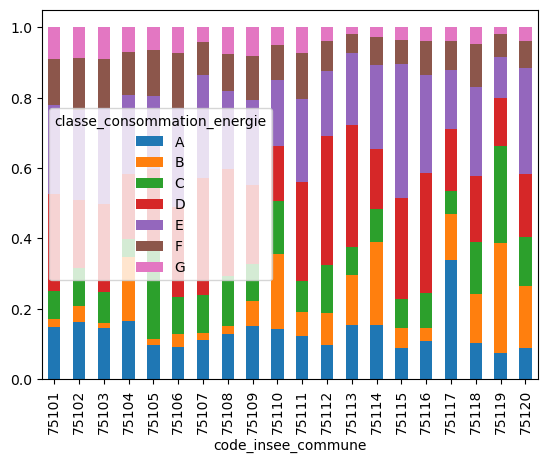

In [48]:
pd.crosstab(DPE_Paris_c2["code_insee_commune"],DPE_Paris_c2["classe_consommation_energie"],normalize='index')\
.plot.bar(stacked=True)

> On ne note pas à première vue de concentration élevée de logements énergivores (classes d'énergie E, F ou G) au sein des arrondissements dit populaires (18e, 19e et 20e). Dans les arrondissements plus aisés, la part de ces 3 classes d'énergie peut être bien représentée. Il pourrait s'agir d'une spécificité de Paris, avec de nombreux immeubles anciens, construits au XIXeme siècle, typiquement de style "haussmanien" et qui sont habités par des ménages aisés, voire très aisés.

In [49]:
# On peut comparer les différents départements francilens au prisme de la proportion de chaque classe de
# consommation d'énergie:
pd.crosstab(DPE_horsParis["tv016_departement_departement"],DPE_horsParis["classe_consommation_energie"],normalize='index',\
            margins=True)*100

classe_consommation_energie,A,B,C,D,E,F,G,N
tv016_departement_departement,,,,,,,,
77 - Seine et Marne,6.260666,18.888576,8.819856,24.605889,20.791950,7.245372,2.410111,10.977579
78 - Yvelines,3.877539,17.990910,10.207627,27.098544,21.443452,7.290979,2.648060,9.442888
91 - Essonne,5.264302,21.636012,10.375028,23.859957,19.894526,7.427396,2.489804,9.052976
92 - Hauts de Seine,3.460036,17.911934,11.079510,26.118117,18.635185,6.215306,2.098799,14.481114
93 - Seine Saint Denis,4.574982,26.642763,10.890242,20.109217,16.059319,7.099136,2.413136,12.211204
94 - Val de Marne,2.876110,19.152667,11.471560,26.854911,17.682516,6.266537,2.539494,13.156205
95 - Val d'Oise,3.788450,19.975875,11.133896,25.193004,20.539807,7.441194,2.523372,9.404403
All,4.313005,20.164976,10.537271,24.908567,19.358444,6.988453,2.437742,11.291541


In [50]:
DPE_horsParis2=DPE_horsParis[DPE_horsParis["classe_consommation_energie"]!="N"]

In [51]:
pd.crosstab(DPE_horsParis2["tv016_departement_departement"],DPE_horsParis2["classe_consommation_energie"],normalize='index',\
            margins=True)*100

classe_consommation_energie,A,B,C,D,E,F,G
tv016_departement_departement,,,,,,,
77 - Seine et Marne,7.032685,21.217775,9.907455,27.640103,23.355858,8.138817,2.707308
78 - Yvelines,4.281872,19.866921,11.272032,29.924259,23.679479,8.051249,2.924188
91 - Essonne,5.788317,23.789687,11.407771,26.235005,21.874851,8.166728,2.737642
92 - Hauts de Seine,4.045932,20.945004,12.955629,30.540759,21.790724,7.267758,2.454193
93 - Seine Saint Denis,5.211351,30.348705,12.405048,22.906360,18.293131,8.086608,2.748797
94 - Val de Marne,3.311819,22.054157,13.209418,30.923235,20.361289,7.215872,2.924209
95 - Val d'Oise,4.181715,22.049498,12.289666,27.808199,22.671970,8.213638,2.785314
All,4.862000,22.731739,11.878542,28.079134,21.822546,7.878001,2.748038


<AxesSubplot: xlabel='tv016_departement_departement'>

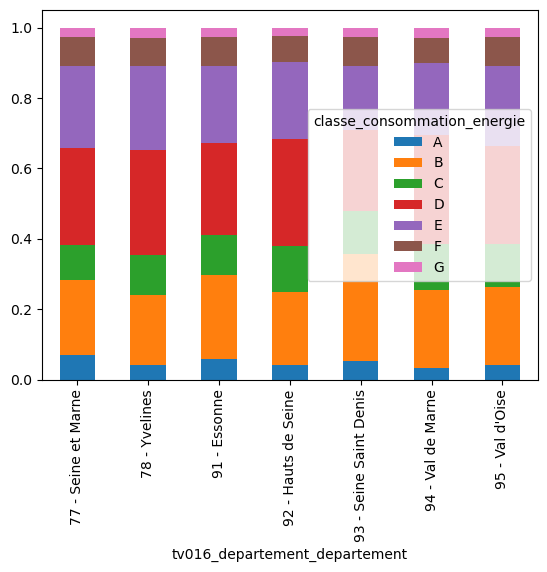

In [52]:
pd.crosstab(DPE_horsParis2["tv016_departement_departement"],DPE_horsParis2["classe_consommation_energie"],\
            normalize='index').plot.bar(stacked=True)

> Il ressort que le département qui concentre le plus de logements performants en termes de consommation d'énergie (classes A, B ou C) est le 93, un des départements les plus pauvres de France!
Effet de l'ancienneté du bâti: le 93 concentre de nombreux logements sociaux aux normes énergétiques récentes, alors que des départements riches comme le 78 ou le 92 vont rassembler davantage de logements anciens, à caractère historique.
Ou bien, artefact statistique: problème dans l'échantillon de DPE retenu au départ (en l'absence d'un échantillonnage "propre" avec une stratification géographique par ex.)

In [ ]:
# Création d'une variable catégorielle, mesurant l'ancienneté des logements, à partir de la
# variable "annee_construction":

### b) Retraitement des données de Filosofi:

In [53]:
Filosofi.head()

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,PPEN16,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16
0,01001,L'Abergement-Clémenciat,313,795.5,22679,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01002,L'Abergement-de-Varey,101,248,24382.083333333336,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01004,Ambérieu-en-Bugey,6363,14228,19721,49,17,19,22,22,...,27,8.8,6.9,2.8,2.1,2,-15.7,10457.083333333334,33880.555555555555,3.239962279688143
3,01005,Ambérieux-en-Dombes,633,1662.5,23378,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01006,Ambléon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Modification des types des variables: passage au format numérique de toutes les variables sauf codgeo et libgeo.
liste_var=Filosofi.columns.tolist()[2:]
for var in liste_var:
    Filosofi[var]=pd.to_numeric(Filosofi[var])
Filosofi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34932 entries, 0 to 34931
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODGEO           34932 non-null  object 
 1   LIBGEO           34932 non-null  object 
 2   NBMENFISC16      31405 non-null  float64
 3   NBPERSMENFISC16  31405 non-null  float64
 4   MED16            31405 non-null  float64
 5   PIMP16           5293 non-null   float64
 6   TP6016           4372 non-null   float64
 7   TP60AGE116       759 non-null    float64
 8   TP60AGE216       1414 non-null   float64
 9   TP60AGE316       1826 non-null   float64
 10  TP60AGE416       1292 non-null   float64
 11  TP60AGE516       890 non-null    float64
 12  TP60AGE616       403 non-null    float64
 13  TP60TOL116       2155 non-null   float64
 14  TP60TOL216       3174 non-null   float64
 15  PACT16           5293 non-null   float64
 16  PTSA16           5293 non-null   float64
 17  PCHO16      

In [61]:
# Création d'une variable "département":
Filosofi["DEP"]=Filosofi["CODGEO"].str[:2]

In [63]:
# Filtrage géographique: on ne garde que les départements d'Ile-de-France:
Filosofi_IDF=Filosofi[Filosofi["DEP"].isin(["75","91","92","93","94","95","77","78"])]

In [64]:
Filosofi_IDF['CODGEO'].value_counts()

75056    1
91347    1
91249    1
91248    1
91247    1
        ..
77429    1
77428    1
77427    1
77426    1
95690    1
Name: CODGEO, Length: 1288, dtype: int64

In [65]:
Filosofi_IDF['CODGEO'].nunique()

1288

In [66]:
Filosofi_IDF['DEP'].value_counts()

77    507
78    259
91    194
95    184
94     47
93     40
92     36
75     21
Name: DEP, dtype: int64

### c) Jointure des fichiers DPE et FILOSOFI au niveau de la commune

In [186]:
# Le dataframe regroupant l'ensemble des DPE d'IDF (après retraitement des données)
DPE_IDF_clean=pd.concat([DPE_Paris_c2,DPE_horsParis2])

In [187]:
DPE_IDF_clean2=DPE_IDF_clean.reset_index(drop=True)

In [188]:
# Nettoyage de la variable "code_insee_commune":
# liste des codes commune exisistant initialement dans le fichier DPE brut:
a=DPE_IDF_clean2["code_insee_commune"].unique().tolist()
# on transforme les éléments de la liste en str:
b=[str(x) for x in a]
# on code le filtre à appliquer à notre df DPE_IDF_clean3:
filtre = [x for x in b if len(x) == 5 if "." not in x if x[:2] in (["75","77","91","92","93","94","95"])]
print(len(filtre)) # nombre de codes commune retenus in fine pour l'IDF (sur la période 2014-2020).

1607


In [189]:
# Filtrage de DPE_IDF_clean3:
DPE_IDF_clean3=DPE_IDF_clean2[DPE_IDF_clean3["code_insee_commune"].isin(filtre)]

In [190]:
DPE_IDF_clean3.head()

,id,numero_dpe,date_visite_diagnostiqueur,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_habitable,surface_thermique_lot,commune,code_insee_commune,longitude,latitude,tr002_type_batiment_description,tv016_departement_departement,annee
0,548668,1375V2010388W,2014-12-23,424.56,F,13.82,C,1900,43.00,43.00,PARIS,75110,2.355244,48.873940,Logement,75 - Paris,2014
1,554800,1475V2000008L,2014-01-02,419.24,F,81.56,G,1948,32.01,32.01,PARIS,75115,2.313344,48.843078,Logement,75 - Paris,2014
2,554903,1475L2000006I,2014-01-02,319.39,E,10.39,B,1947,40.00,40.00,PARIS,75111,2.369706,48.864665,Logement,75 - Paris,2014
3,555032,1475L2000008K,2014-01-02,262.34,E,8.54,B,1947,21.00,21.00,PARIS,75103,2.360059,48.865255,Logement,75 - Paris,2014
4,555692,1475V2000023I,2014-01-02,176.71,D,41.35,E,1948,149.39,149.39,PARIS,75116,2.267229,48.849081,Logement,75 - Paris,2014


In [191]:
# on transforme la variable qualitative "classe_consommation_energie" en indicatrices:
Classe_conso_IDF=pd.get_dummies(DPE_IDF_clean3["classe_consommation_energie"])

In [192]:
Classe_conso_IDF.head()

,A,B,C,D,E,F,G
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0


In [193]:
# on fusionne ce df avec DPE_IDF_clean3:
DPE_IDF_clean4 = DPE_IDF_clean3.merge(Classe_conso_IDF, how = "left", left_index = True, right_index = True)

In [194]:
DPE_IDF_clean4.head()

,id,numero_dpe,date_visite_diagnostiqueur,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_habitable,surface_thermique_lot,...,tr002_type_batiment_description,tv016_departement_departement,annee,A,B,C,D,E,F,G
0,548668,1375V2010388W,2014-12-23,424.56,F,13.82,C,1900,43.00,43.00,...,Logement,75 - Paris,2014,0,0,0,0,0,1,0
1,554800,1475V2000008L,2014-01-02,419.24,F,81.56,G,1948,32.01,32.01,...,Logement,75 - Paris,2014,0,0,0,0,0,1,0
2,554903,1475L2000006I,2014-01-02,319.39,E,10.39,B,1947,40.00,40.00,...,Logement,75 - Paris,2014,0,0,0,0,1,0,0
3,555032,1475L2000008K,2014-01-02,262.34,E,8.54,B,1947,21.00,21.00,...,Logement,75 - Paris,2014,0,0,0,0,1,0,0
4,555692,1475V2000023I,2014-01-02,176.71,D,41.35,E,1948,149.39,149.39,...,Logement,75 - Paris,2014,0,0,0,1,0,0,0


In [195]:
# On calcule la proportion de chaque classe de conso d'énergie (A, B, C, etc.) au sein de chaque code commune:
DPE_IDF_clean5=DPE_IDF_clean4[["code_insee_commune","A","B","C","D","E","F","G"]]

In [196]:
DPE_IDF_clean5.head()

,code_insee_commune,A,B,C,D,E,F,G
0,75110,0,0,0,0,0,1,0
1,75115,0,0,0,0,0,1,0
2,75111,0,0,0,0,1,0,0
3,75103,0,0,0,0,1,0,0
4,75116,0,0,0,1,0,0,0


In [216]:
Classe_conso_COM=DPE_IDF_clean5.groupby('code_insee_commune').mean().reset_index()

In [217]:
Classe_conso_COM.head()

,code_insee_commune,A,B,C,D,E,F,G
0,75000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,75002,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,75014,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
3,75015,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,75056,0.055556,0.018519,0.092593,0.314815,0.296296,0.148148,0.074074


In [218]:
Classe_conso_COM["Total"]=Classe_conso_COM.sum(axis=1)
Classe_conso_COM.head()

/tmp/ipykernel_443/1564311970.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Classe_conso_COM["Total"]=Classe_conso_COM.sum(axis=1)


,code_insee_commune,A,B,C,D,E,F,G,Total
0,75000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
1,75002,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
2,75014,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
3,75015,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
4,75056,0.055556,0.018519,0.092593,0.314815,0.296296,0.148148,0.074074,1.0


In [219]:
# Création d'une variable département (DEP) à partir du code commune:
Classe_conso_COM["DEP"]=Classe_conso_COM["code_insee_commune"].str[:2]

In [220]:
Classe_conso_COM.sample(10)

,code_insee_commune,A,B,C,D,E,F,G,Total,DEP
336,77368,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,1.0,77
1129,9546O,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,95
713,92032,0.009950,0.019900,0.068408,0.422886,0.379353,0.082090,0.017413,1.0,92
1101,95390,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,95
645,91568,0.166667,0.000000,0.166667,0.166667,0.166667,0.333333,0.000000,1.0,91
1136,95490,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,95
970,94420,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,94
600,91408,0.166667,0.000000,0.000000,0.166667,0.166667,0.333333,0.166667,1.0,91
1126,95459,0.250000,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,1.0,95
784,92500,0.111111,0.111111,0.111111,0.444444,0.222222,0.000000,0.000000,1.0,92


In [237]:
# Comptage du nombre de DPE par commune:
Classe_conso_COM2=DPE_IDF_clean5.groupby('code_insee_commune')["A"].count().reset_index()
Classe_conso_COM3=Classe_conso_COM2.rename(columns = {'A': 'Nombre de DPE'})
del Classe_conso_COM3["code_insee_commune"]
Classe_conso_COM3.head()

,Nombre de DPE
0,1
1,1
2,1
3,1
4,54


In [246]:
Classe_conso_COM4 = Classe_conso_COM.merge(Classe_conso_COM3, how = "left", left_index = True, right_index = True)
Classe_conso_COM4.head()

,code_insee_commune,A,B,C,D,E,F,G,Total,DEP,Nombre de DPE
0,75000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,75,1
1,75002,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,75,1
2,75014,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,75,1
3,75015,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,75,1
4,75056,0.055556,0.018519,0.092593,0.314815,0.296296,0.148148,0.074074,1.0,75,54


In [223]:
Filosofi_IDF.sample(10)

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16,DEP
34689,94081,Vitry-sur-Seine,34404.0,90172.5,17943.333333,50.0,24.0,31.0,27.0,29.0,...,5.9,8.3,3.2,2.8,2.3,-15.6,9054.761905,33552.666667,3.705527,94
30529,78013,Andelu,163.0,472.5,28186.400000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78
30034,77020,Bannost-Villegagnon,234.0,664.0,23646.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77
30623,78278,Goupillières,186.0,509.5,29538.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78
34613,93029,Drancy,25817.0,70434.0,16846.000000,46.0,29.0,30.0,33.0,35.0,...,5.8,9.8,3.7,3.5,2.6,-14.7,8169.500000,30313.000000,3.710509,93
34822,95487,Persan,4309.0,11873.5,17749.565217,45.0,22.0,NaN,21.0,27.0,...,2.6,9.3,4.4,2.6,2.4,-13.0,9490.000000,28776.521739,3.032299,95
30527,78009,Allainville,103.0,279.0,23660.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78
30571,78133,Chambourcy,2241.0,5680.5,31110.000000,76.0,6.0,NaN,NaN,NaN,...,17.0,1.9,1.0,0.5,0.4,-27.8,15053.000000,66804.761905,4.437970,78
34425,91179,Le Coudray-Montceaux,1845.0,4823.0,24353.571429,71.0,7.0,NaN,NaN,NaN,...,7.7,3.5,2.1,0.7,0.7,-18.9,14023.913043,40318.666667,2.874994,91
30727,78530,Rosay,151.0,360.5,25224.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78


In [239]:
print(Filosofi_IDF["CODGEO"].dtype)
print(Classe_conso_COM4["code_insee_commune"].dtype)

object
object


In [247]:
# Jointure avec le fichier Filosofi en prenant comme clé: le code commune:
del Classe_conso_COM4["DEP"]
Filosofi_DPE_COM=pd.merge(Filosofi_IDF,Classe_conso_COM4,left_on="CODGEO",right_on="code_insee_commune",how="left")
Filosofi_DPE_COM.head()

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,code_insee_commune,A,B,C,D,E,F,G,Total,Nombre de DPE
0,75056,Paris,1027657.0,2074629.5,26808.000000,69.0,16.0,17.0,13.0,17.0,...,75056,0.055556,0.018519,0.092593,0.314815,0.296296,0.148148,0.074074,1.0,54.0
1,75101,Paris 1er Arrondissement,8483.0,15477.0,32697.333333,73.0,11.0,15.0,9.0,11.0,...,75101,0.147427,0.022253,0.082058,0.275382,0.253129,0.129346,0.090403,1.0,719.0
2,75102,Paris 2e Arrondissement,11362.0,20563.0,30566.500000,71.0,14.0,14.0,11.0,14.0,...,75102,0.161458,0.046875,0.107639,0.194444,0.253472,0.147569,0.088542,1.0,576.0
3,75103,Paris 3e Arrondissement,17727.0,32292.5,31333.000000,73.0,13.0,16.0,11.0,11.0,...,75103,0.144144,0.016216,0.087387,0.248649,0.272973,0.141441,0.089189,1.0,1110.0
4,75104,Paris 4e Arrondissement,13955.0,25585.5,31007.222222,72.0,12.0,16.0,11.0,13.0,...,75104,0.164482,0.182360,0.051251,0.183552,0.226460,0.122765,0.069130,1.0,839.0


In [253]:
#checks de dimensionnalité des df finaux:
print(Filosofi_IDF.shape)
print(Classe_conso_COM4.shape)
print(Filosofi_DPE_COM.shape)

(1288, 30)
(1206, 10)
(1288, 40)


In [254]:
Filosofi_DPE_COM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1288 entries, 0 to 1287
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CODGEO              1288 non-null   object 
 1   LIBGEO              1288 non-null   object 
 2   NBMENFISC16         1270 non-null   float64
 3   NBPERSMENFISC16     1270 non-null   float64
 4   MED16               1270 non-null   float64
 5   PIMP16              560 non-null    float64
 6   TP6016              457 non-null    float64
 7   TP60AGE116          193 non-null    float64
 8   TP60AGE216          284 non-null    float64
 9   TP60AGE316          304 non-null    float64
 10  TP60AGE416          264 non-null    float64
 11  TP60AGE516          221 non-null    float64
 12  TP60AGE616          91 non-null     float64
 13  TP60TOL116          291 non-null    float64
 14  TP60TOL216          392 non-null    float64
 15  PACT16              560 non-null    float64
 16  PTSA16

In [256]:
# Dans le but d'avoir des résultats interprétables, on va supprimer les communes dans lesquelles le nombre de DPE
# observés est insuffisant au regard du nombre de ménages fiscaux habitant dans ces communes:
Filosofi_DPE_COM["ratio_DPE_menage"]=Filosofi_DPE_COM["Nombre de DPE"]/Filosofi_DPE_COM["NBMENFISC16"]
Filosofi_DPE_COM["ratio_DPE_menage"].describe()

count    939.000000
mean       0.067473
std        0.185041
min        0.000053
25%        0.012987
50%        0.026182
75%        0.061276
max        2.518868
Name: ratio_DPE_menage, dtype: float64

In [258]:
# Dans un premier temps, on ne garde que les communes dont le ratio DPE/nb_ménages est supérieur à 0,03
# (ratio médian)
Filosofi_DPE_COM2=Filosofi_DPE_COM[Filosofi_DPE_COM["ratio_DPE_menage"]>0.03]

In [259]:
Filosofi_DPE_COM2.shape

(434, 41)

In [260]:
Filosofi_DPE_COM2.head()

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,A,B,C,D,E,F,G,Total,Nombre de DPE,ratio_DPE_menage
1,75101,Paris 1er Arrondissement,8483.0,15477.0,32697.333333,73.0,11.0,15.0,9.0,11.0,...,0.147427,0.022253,0.082058,0.275382,0.253129,0.129346,0.090403,1.0,719.0,0.084758
2,75102,Paris 2e Arrondissement,11362.0,20563.0,30566.500000,71.0,14.0,14.0,11.0,14.0,...,0.161458,0.046875,0.107639,0.194444,0.253472,0.147569,0.088542,1.0,576.0,0.050695
3,75103,Paris 3e Arrondissement,17727.0,32292.5,31333.000000,73.0,13.0,16.0,11.0,11.0,...,0.144144,0.016216,0.087387,0.248649,0.272973,0.141441,0.089189,1.0,1110.0,0.062616
4,75104,Paris 4e Arrondissement,13955.0,25585.5,31007.222222,72.0,12.0,16.0,11.0,13.0,...,0.164482,0.182360,0.051251,0.183552,0.226460,0.122765,0.069130,1.0,839.0,0.060122
5,75105,Paris 5e Arrondissement,25976.0,48846.5,33169.333333,74.0,10.0,23.0,10.0,10.0,...,0.096661,0.018453,0.276801,0.205624,0.208260,0.130053,0.064148,1.0,1138.0,0.043810


### 3) Premières visualisations: Performance énergétique des logements et niveau de vie 

### a) Corrélation entre niveau de vie médian des communes et proportions de logements énergivores

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

import plotly
import plotly.express as px
from IPython.display import HTML #pour afficher les graphs
# dans une cellule de notebook


In [262]:
# Pour que les graphiques apparaissent dans le Notebook Jupyter:
%matplotlib inline

#### Définition 1 des logements énergivores: classe de performance énergétique G.

Text(0.5, 1.0, "Poids des logements énergivores dans les communes d'Ile-de-France en fonction de leur niveau de vie médian")

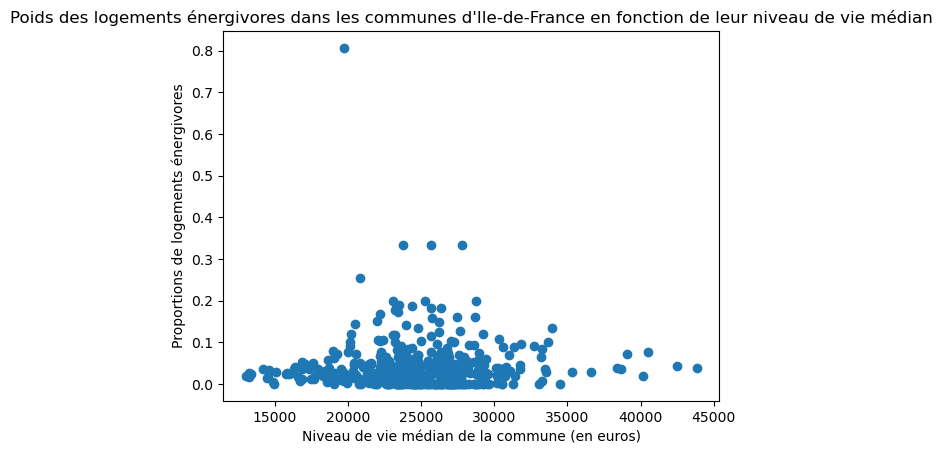

In [265]:
# Nuage de points: niveau de vie médian de la commune vs proportion de logements énergivores (classe G)
plt.figure()
plt.scatter(Filosofi_DPE_COM2["MED16"],Filosofi_DPE_COM2["G"])
plt.xlabel("Niveau de vie médian de la commune (en euros)")
plt.ylabel("Proportions de logements énergivores")
plt.title("Poids des logements énergivores dans les communes d'Ile-de-France en fonction de leur niveau de vie médian")

Text(0.5, 1.0, 'Poids des logements énergivores dans les arrondissements parisiens en fonction de leur niveau de vie médian')

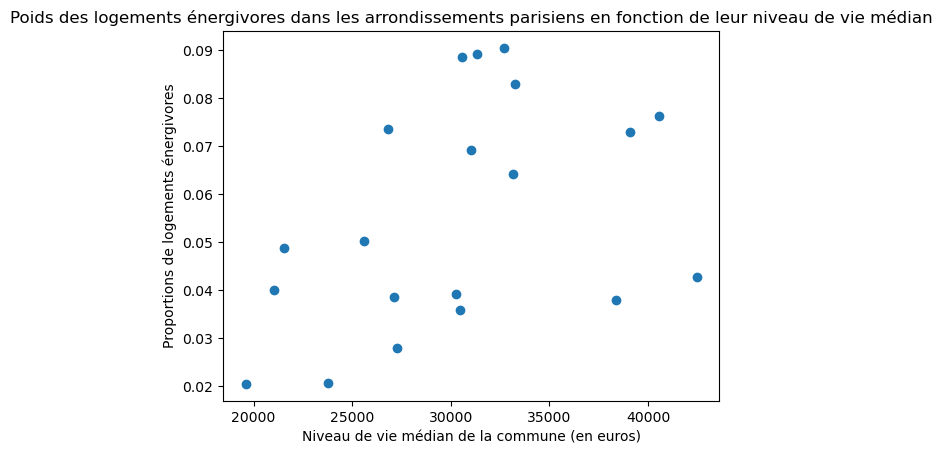

In [268]:
# Zoom sur Paris:
plt.figure()
Filosofi_DPE_Paris=Filosofi_DPE_COM2[Filosofi_DPE_COM2["DEP"]=="75"]
plt.scatter(Filosofi_DPE_Paris["MED16"],Filosofi_DPE_Paris["G"])
plt.xlabel("Niveau de vie médian de la commune (en euros)")
plt.ylabel("Proportions de logements énergivores")
plt.title("Poids des logements énergivores dans les arrondissements parisiens en fonction de leur niveau de vie médian")

Text(0.5, 1.0, '95')

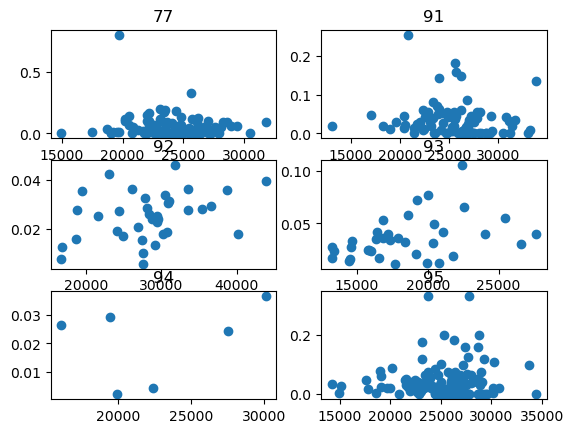

In [271]:
# Distinction selon les départements d'IDF (hors Paris):
plt.figure()
plt.subplot(3,2,1)
Filosofi_DPE_77=Filosofi_DPE_COM2[Filosofi_DPE_COM2["DEP"]=="77"]
plt.scatter(Filosofi_DPE_77["MED16"],Filosofi_DPE_77["G"])
plt.title("77")
plt.subplot(3,2,2)
Filosofi_DPE_91=Filosofi_DPE_COM2[Filosofi_DPE_COM2["DEP"]=="91"]
plt.scatter(Filosofi_DPE_91["MED16"],Filosofi_DPE_91["G"])
plt.title("91")
plt.subplot(3,2,3)
Filosofi_DPE_92=Filosofi_DPE_COM2[Filosofi_DPE_COM2["DEP"]=="92"]
plt.scatter(Filosofi_DPE_92["MED16"],Filosofi_DPE_92["G"])
plt.title("92")
plt.subplot(3,2,4)
Filosofi_DPE_93=Filosofi_DPE_COM2[Filosofi_DPE_COM2["DEP"]=="93"]
plt.scatter(Filosofi_DPE_93["MED16"],Filosofi_DPE_93["G"])
plt.title("93")
plt.subplot(3,2,5)
Filosofi_DPE_94=Filosofi_DPE_COM2[Filosofi_DPE_COM2["DEP"]=="94"]
plt.scatter(Filosofi_DPE_94["MED16"],Filosofi_DPE_94["G"])
plt.title("94")
plt.subplot(3,2,6)
Filosofi_DPE_95=Filosofi_DPE_COM2[Filosofi_DPE_COM2["DEP"]=="95"]
plt.scatter(Filosofi_DPE_95["MED16"],Filosofi_DPE_95["G"])
plt.title("95")

#### Définition 2 des logements énergivores: classes de performance énergétique F et G.

In [298]:
# Codage de l'indicatrice "est énergivore" (définition 2):
x=Filosofi_DPE_COM2[["F","G"]]
x["FG"]=x.sum(axis=1)
FG=x[["FG"]]
Filosofi_DPE_COM3=Filosofi_DPE_COM2.merge(FG,left_index=True,right_index=True)
Filosofi_DPE_COM3.head()

/tmp/ipykernel_443/2996273967.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,B,C,D,E,F,G,Total,Nombre de DPE,ratio_DPE_menage,FG
1,75101,Paris 1er Arrondissement,8483.0,15477.0,32697.333333,73.0,11.0,15.0,9.0,11.0,...,0.022253,0.082058,0.275382,0.253129,0.129346,0.090403,1.0,719.0,0.084758,0.219750
2,75102,Paris 2e Arrondissement,11362.0,20563.0,30566.500000,71.0,14.0,14.0,11.0,14.0,...,0.046875,0.107639,0.194444,0.253472,0.147569,0.088542,1.0,576.0,0.050695,0.236111
3,75103,Paris 3e Arrondissement,17727.0,32292.5,31333.000000,73.0,13.0,16.0,11.0,11.0,...,0.016216,0.087387,0.248649,0.272973,0.141441,0.089189,1.0,1110.0,0.062616,0.230631
4,75104,Paris 4e Arrondissement,13955.0,25585.5,31007.222222,72.0,12.0,16.0,11.0,13.0,...,0.182360,0.051251,0.183552,0.226460,0.122765,0.069130,1.0,839.0,0.060122,0.191895
5,75105,Paris 5e Arrondissement,25976.0,48846.5,33169.333333,74.0,10.0,23.0,10.0,10.0,...,0.018453,0.276801,0.205624,0.208260,0.130053,0.064148,1.0,1138.0,0.043810,0.194200


Text(0.5, 1.0, "Poids des logements énergivores dans les communes d'Ile-de-France en fonction de leur niveau de vie médian")

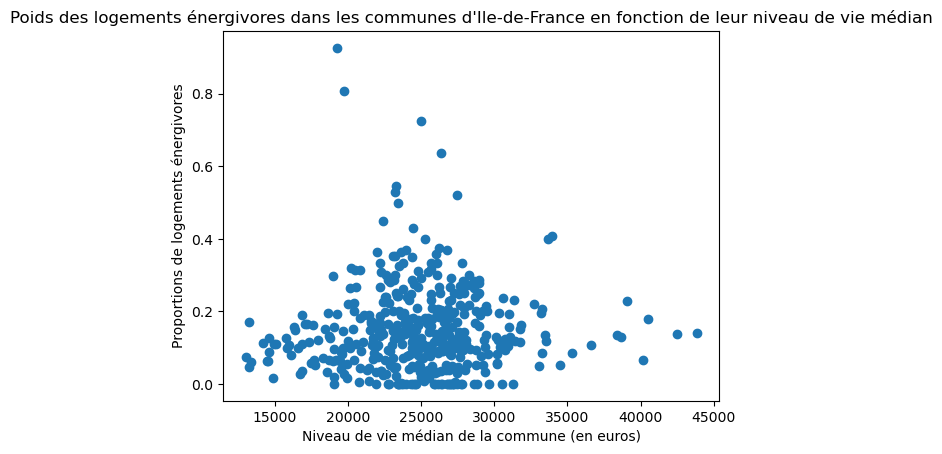

In [299]:
# Nuage de points: niveau de vie médian de la commune vs proportion de logements énergivores (classes F ou G)
plt.figure()
plt.scatter(Filosofi_DPE_COM3["MED16"],Filosofi_DPE_COM3["FG"])
plt.xlabel("Niveau de vie médian de la commune (en euros)")
plt.ylabel("Proportions de logements énergivores")
plt.title("Poids des logements énergivores dans les communes d'Ile-de-France en fonction de leur niveau de vie médian")

#### Discrétisation de la variable "niveau de vie médian" en quintiles.

In [362]:
Filosofi_DPE_COM3["MED16_disc"]=pd.qcut(Filosofi_DPE_COM3["MED16"],q=5,labels=["Q1","Q2","Q3","Q4","Q5"])
Filosofi_DPE_COM3["MED16_disc"].value_counts()

Q1    87
Q2    87
Q4    87
Q5    87
Q3    86
Name: MED16_disc, dtype: int64

In [363]:
Filosofi_DPE_COM3.head()

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,E,F,G,Total,Nombre de DPE,ratio_DPE_menage,FG,MED16_disc,FG_pct,FG_disc
1,75101,Paris 1er Arrondissement,8483.0,15477.0,32697.333333,73.0,11.0,15.0,9.0,11.0,...,0.253129,0.129346,0.090403,1.0,719.0,0.084758,0.219750,Q5,21.974965,Part énergivores entre 20% et 50%
2,75102,Paris 2e Arrondissement,11362.0,20563.0,30566.500000,71.0,14.0,14.0,11.0,14.0,...,0.253472,0.147569,0.088542,1.0,576.0,0.050695,0.236111,Q5,23.611111,Part énergivores entre 20% et 50%
3,75103,Paris 3e Arrondissement,17727.0,32292.5,31333.000000,73.0,13.0,16.0,11.0,11.0,...,0.272973,0.141441,0.089189,1.0,1110.0,0.062616,0.230631,Q5,23.063063,Part énergivores entre 20% et 50%
4,75104,Paris 4e Arrondissement,13955.0,25585.5,31007.222222,72.0,12.0,16.0,11.0,13.0,...,0.226460,0.122765,0.069130,1.0,839.0,0.060122,0.191895,Q5,19.189511,Part énergivores<20%
5,75105,Paris 5e Arrondissement,25976.0,48846.5,33169.333333,74.0,10.0,23.0,10.0,10.0,...,0.208260,0.130053,0.064148,1.0,1138.0,0.043810,0.194200,Q5,19.420035,Part énergivores<20%


In [364]:
# proportion de logements énergivore dans chaque commune - conversion en %
Filosofi_DPE_COM3['FG_pct']=Filosofi_DPE_COM3['FG']*100

In [365]:
Filosofi_DPE_COM3['FG_pct'].describe()

count    434.000000
mean      14.820493
std       11.822658
min        0.000000
25%        7.146220
50%       12.763533
75%       19.973822
max       92.647059
Name: FG_pct, dtype: float64

In [366]:
# On commence par créer une variable catégorielle (5 catégories: plus on est dans une catégorie
# élevée, plus la part de logements énergivores est élevée dans la commune.

Filosofi_DPE_COM3['FG_disc'] = pd.cut(Filosofi_DPE_COM3['FG_pct'],bins=[-1,0,20,50,100],\
                                      labels=["Part nulle d'énergivores","Part énergivores<20%",\
                                              "Part énergivores entre 20% et 50%",\
                                              "Part énergivores>50%"],\
                                     ordered=False)


<AxesSubplot: xlabel='Niveau de vie médian (quintiles de communes)', ylabel='Part de logements énergivores'>

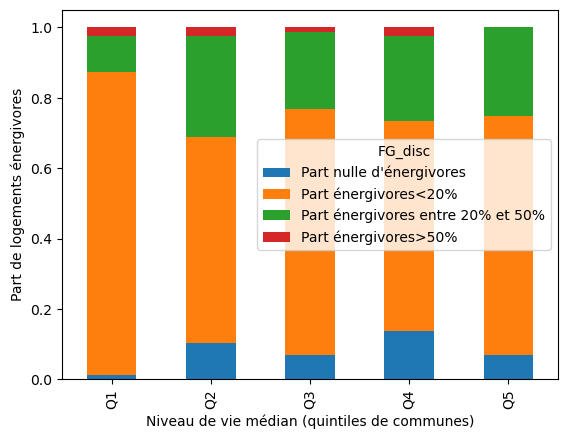

In [369]:
pd.crosstab(Filosofi_DPE_COM3["MED16_disc"],Filosofi_DPE_COM3["FG_disc"],\
            normalize='index').plot.bar(stacked=True,xlabel="Niveau de vie médian (quintiles de communes)",\
                                       ylabel="Part de logements énergivores")

Text(0, 0.5, 'Niveau de vie médian (par quintile de communes)')

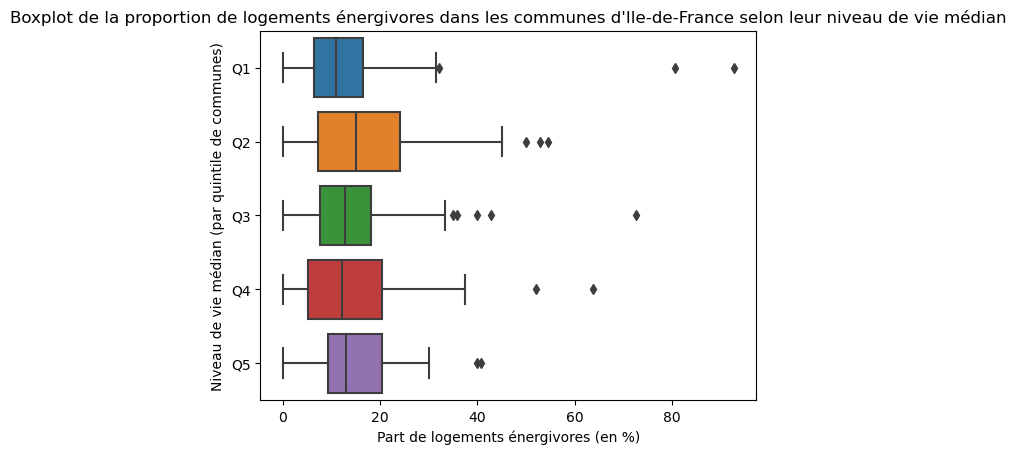

In [370]:
# distribution de la part de logements énergivores dans les communes en fonction de leur
# niveau de vie médian:
sns.boxplot(data=Filosofi_DPE_COM3,x="FG_pct",y="MED16_disc")
plt.title("Boxplot de la proportion de logements énergivores dans les communes d'Ile-de-France selon leur niveau de vie médian")
plt.xlabel("Part de logements énergivores (en %)")
plt.ylabel("Niveau de vie médian (par quintile de communes)")

### b) Visualisation des communes "socialement vulnérables" à la crise énergétique actuelle

In [374]:
# Définition de la vulnérabilité: communes avec plus de 20% de logements énergivores et qui sont classés
# parmi les 40% des communes les plus pauvres:
filtre1=Filosofi_DPE_COM3["MED16_disc"].isin(["Q1","Q2"])# 40% des communes les plus pauvres
filtre2=Filosofi_DPE_COM3["FG_pct"]>20
COM_vulnerables=Filosofi_DPE_COM3[filtre1 & filtre2]
COM_vulnerables["vulnerables"]="OUI"

/tmp/ipykernel_443/3404004448.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [375]:
COM_vulnerables.shape

(38, 46)

In [379]:
# communes non vulnérables:
COM_nonvulnerables=Filosofi_DPE_COM3[~(filtre1 & filtre2)]
COM_vulnerables["vulnerables"]="NON"
COM_nonvulnerables.shape

/tmp/ipykernel_443/1785305140.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(396, 45)

In [376]:
display(COM_vulnerables)

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,F,G,Total,Nombre de DPE,ratio_DPE_menage,FG,MED16_disc,FG_pct,FG_disc,vulnerables
22,77002,Amillis,293.0,758.0,22876.666667,NaN,NaN,NaN,NaN,NaN,...,0.239437,0.042254,1.0,71.0,0.242321,0.281690,Q2,28.169014,Part énergivores entre 20% et 50%,OUI
28,77008,Armentières-en-Brie,351.0,1179.5,20220.000000,NaN,NaN,NaN,NaN,NaN,...,0.200000,0.120000,1.0,50.0,0.142450,0.320000,Q1,32.000000,Part énergivores entre 20% et 50%,OUI
29,77009,Arville,50.0,107.0,23276.000000,NaN,NaN,NaN,NaN,NaN,...,0.250000,0.000000,1.0,8.0,0.160000,0.250000,Q2,25.000000,Part énergivores entre 20% et 50%,OUI
31,77011,Aufferville,205.0,553.0,23311.538462,NaN,NaN,NaN,NaN,NaN,...,0.363636,0.181818,1.0,11.0,0.053659,0.545455,Q2,54.545455,Part énergivores>50%,OUI
32,77012,Augers-en-Brie,107.0,298.0,22286.000000,NaN,NaN,NaN,NaN,NaN,...,0.230769,0.076923,1.0,13.0,0.121495,0.307692,Q2,30.769231,Part énergivores entre 20% et 50%,OUI
39,77020,Bannost-Villegagnon,234.0,664.0,23646.666667,NaN,NaN,NaN,NaN,NaN,...,0.272727,0.090909,1.0,11.0,0.047009,0.363636,Q2,36.363636,Part énergivores entre 20% et 50%,OUI
42,77023,Barcy,101.0,288.0,22607.142857,NaN,NaN,NaN,NaN,NaN,...,0.300000,0.000000,1.0,20.0,0.198020,0.300000,Q2,30.000000,Part énergivores entre 20% et 50%,OUI
48,77030,Bellot,300.0,779.5,22010.555556,NaN,NaN,NaN,NaN,NaN,...,0.212121,0.151515,1.0,33.0,0.110000,0.363636,Q2,36.363636,Part énergivores entre 20% et 50%,OUI
50,77032,Beton-Bazoches,338.0,888.5,20560.000000,NaN,NaN,NaN,NaN,NaN,...,0.196429,0.071429,1.0,56.0,0.165680,0.267857,Q1,26.785714,Part énergivores entre 20% et 50%,OUI
53,77035,Blennes,226.0,588.0,23391.428571,NaN,NaN,NaN,NaN,NaN,...,0.068966,0.172414,1.0,29.0,0.128319,0.241379,Q2,24.137931,Part énergivores entre 20% et 50%,OUI


In [381]:
Filosofi_DPE_COM4=pd.concat([COM_vulnerables,COM_nonvulnerables])

In [382]:
Filosofi_DPE_COM4.head()

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,F,G,Total,Nombre de DPE,ratio_DPE_menage,FG,MED16_disc,FG_pct,FG_disc,vulnerables
22,77002,Amillis,293.0,758.0,22876.666667,NaN,NaN,NaN,NaN,NaN,...,0.239437,0.042254,1.0,71.0,0.242321,0.281690,Q2,28.169014,Part énergivores entre 20% et 50%,NON
28,77008,Armentières-en-Brie,351.0,1179.5,20220.000000,NaN,NaN,NaN,NaN,NaN,...,0.200000,0.120000,1.0,50.0,0.142450,0.320000,Q1,32.000000,Part énergivores entre 20% et 50%,NON
29,77009,Arville,50.0,107.0,23276.000000,NaN,NaN,NaN,NaN,NaN,...,0.250000,0.000000,1.0,8.0,0.160000,0.250000,Q2,25.000000,Part énergivores entre 20% et 50%,NON
31,77011,Aufferville,205.0,553.0,23311.538462,NaN,NaN,NaN,NaN,NaN,...,0.363636,0.181818,1.0,11.0,0.053659,0.545455,Q2,54.545455,Part énergivores>50%,NON
32,77012,Augers-en-Brie,107.0,298.0,22286.000000,NaN,NaN,NaN,NaN,NaN,...,0.230769,0.076923,1.0,13.0,0.121495,0.307692,Q2,30.769231,Part énergivores entre 20% et 50%,NON


#### Un peu de cartographie...

In [ ]:
conda install cartopy

Solving environment: - 

In [383]:
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM # données OpenStreetMap.

# on utilise Open Street Map (OSM)
osm_tiles=OSM()

# on crée une figure
plt.figure(figsize=(10,10))

# on crée notre fond de carte en adaptant aux coordonnées de Paris
ax = plt.axes(projection=osm_tiles.crs)
ax.set_extent([2.2, 2.5, 48.8, 48.91],ccrs.PlateCarree())
ax.add_image(osm_tiles, 12)

# on ajoute un nuage de points avec les données de l'ADEME:
ax.scatter("longitude","latitude",data=DPE_IDF_clean4,s=1,transform=ccrs.PlateCarree(),alpha=.1)

ModuleNotFoundError: No module named 'cartopy'